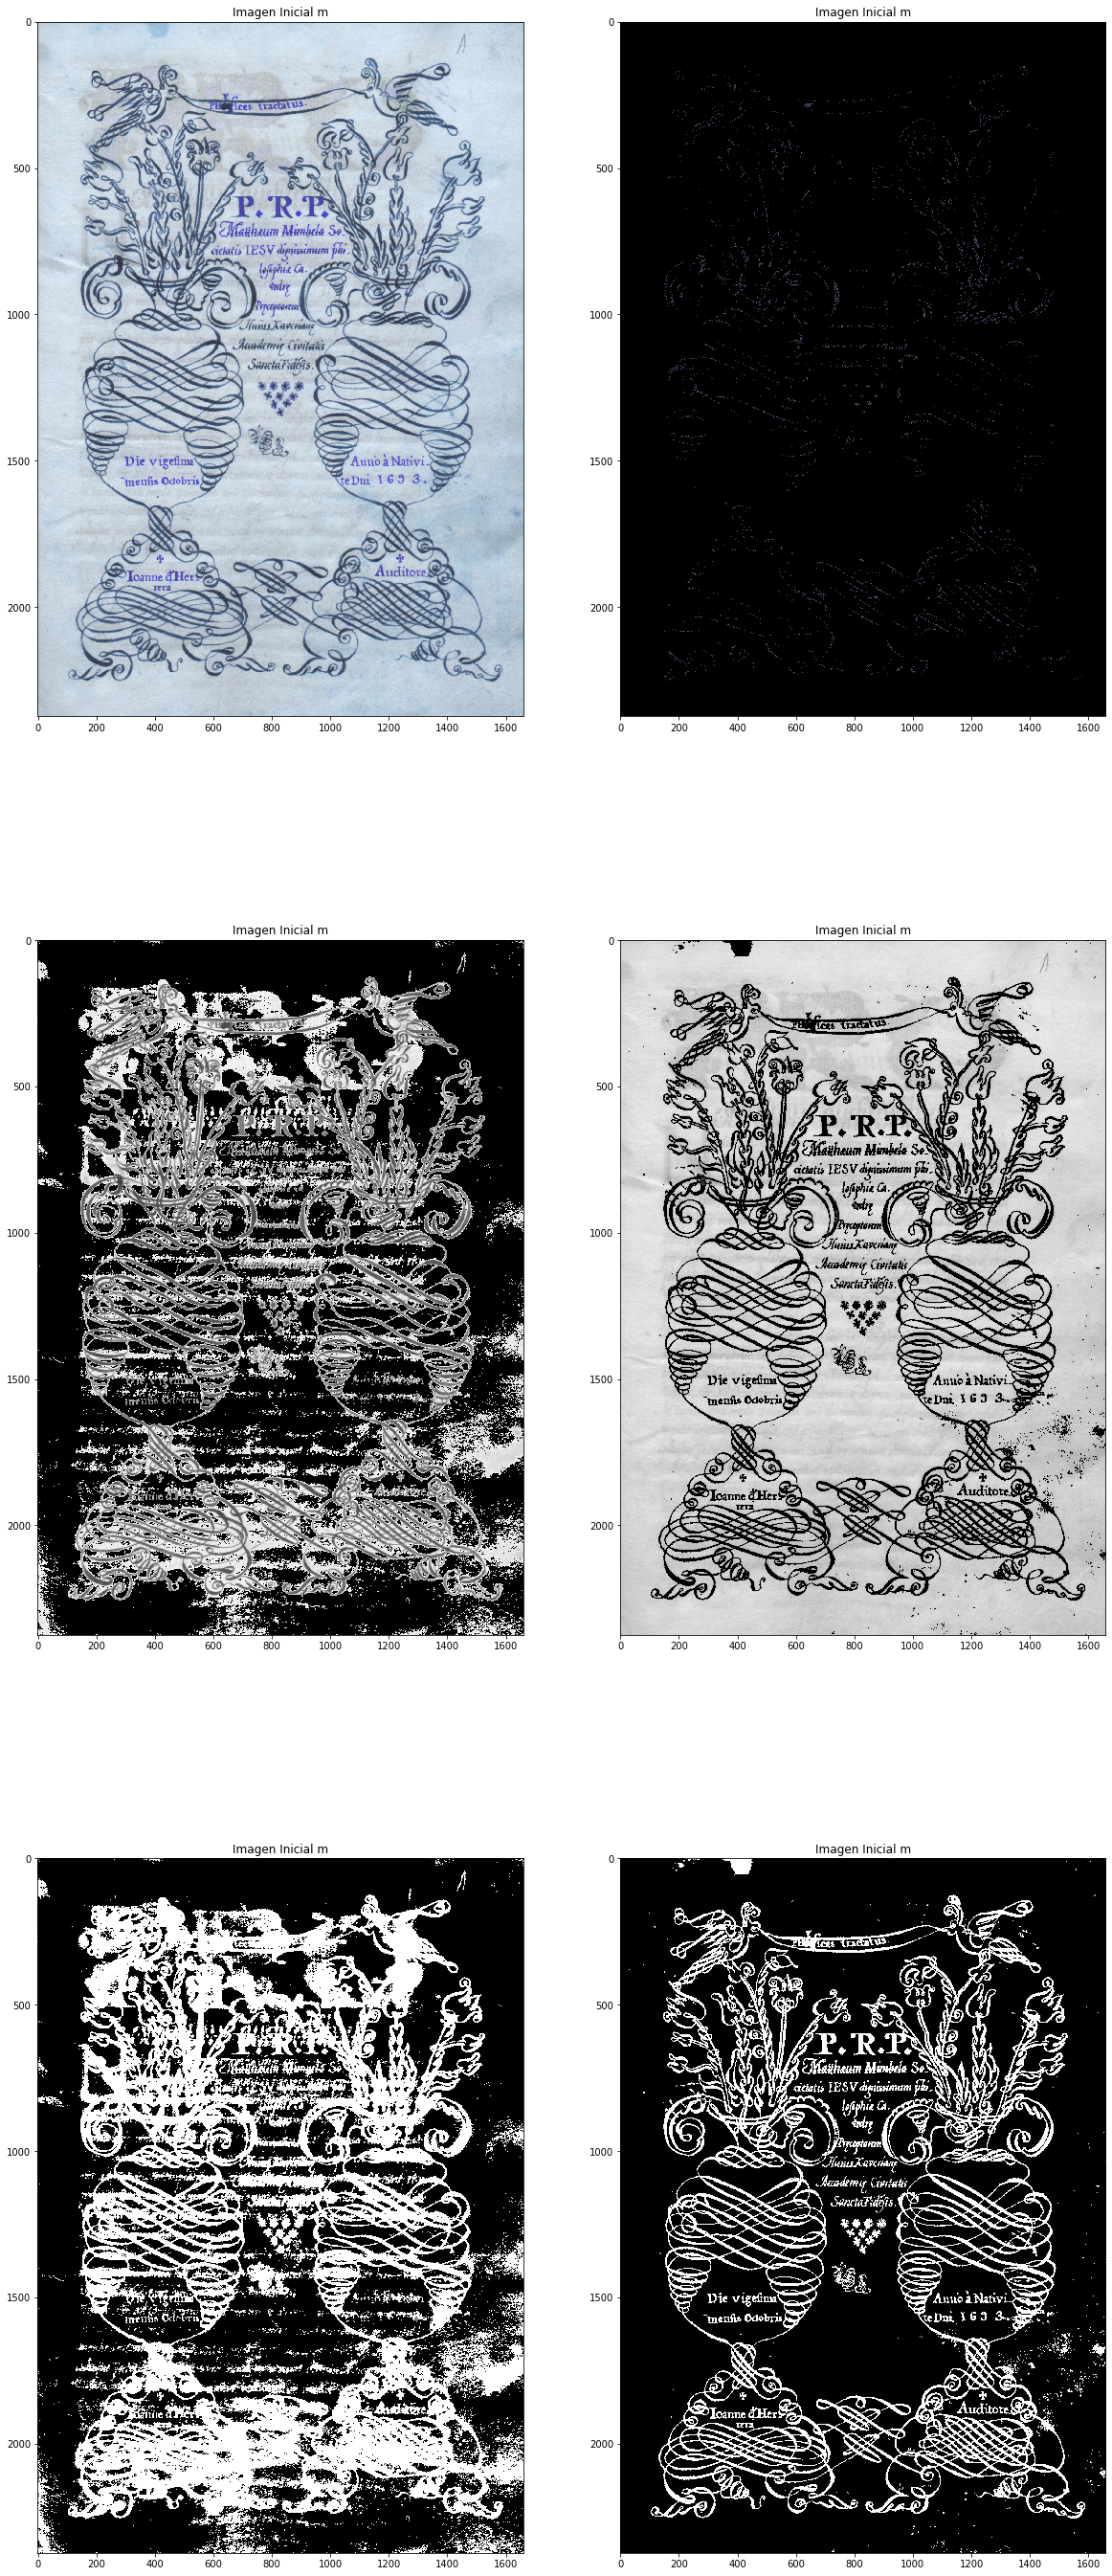

In [3]:
#%load_ext nb_black
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize
import random as rng

img = cv2.imread("Hojas/rm_149_002.tif")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

light_orange = (
    round(14 / 2),
    round(255 * 0.3923),
    round(255 * 0.5098),
)  # 14°, 14.62%, 67.06%

mask = cv2.inRange(hsv, (0, 0, 0), light_orange)
dst1 = cv2.bitwise_and(img, img, mask=mask)

th, threshed = cv2.threshold(v, 210, 255, cv2.THRESH_BINARY_INV)
dst2 = cv2.bitwise_and(img, img, mask=threshed)

th, threshed2 = cv2.threshold(s, 55, 255, cv2.THRESH_BINARY_INV)
dst3 = cv2.bitwise_and(img, img, mask=threshed2)

# cv2.imwrite("dst1.png", dst1)
# cv2.imwrite("dst2.png", dst2)
cv2.imwrite("dst3.png", dst3)


dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2GRAY)
dst3 = cv2.cvtColor(dst3, cv2.COLOR_BGR2GRAY)

th, threshed_dst2 = cv2.threshold(dst2, 0, 100, cv2.THRESH_BINARY)
th, threshed_dst3 = cv2.threshold(dst3, 20, 255, cv2.THRESH_BINARY_INV)
dst4 = cv2.bitwise_and(threshed_dst2, threshed_dst3)
th, threshed_dst4 = cv2.threshold(dst4, 20, 255, cv2.THRESH_BINARY)

# cv2.imwrite("threshed_dst2.png", threshed_dst2)
cv2.imwrite("threshed_dst3.png", threshed_dst3)
# cv2.imwrite("threshed_dst4.png", threshed_dst4)
dst3 = cv2.cvtColor(dst3, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(20, 50))
plt.subplot(3, 2, 1), plt.imshow(img, cmap=plt.cm.gray), plt.title("Imagen Inicial m")
plt.subplot(3, 2, 2), plt.imshow(dst1, cmap=plt.cm.gray), plt.title("Imagen Inicial m")
plt.subplot(3, 2, 3), plt.imshow(dst2, cmap=plt.cm.gray), plt.title("Imagen Inicial m")
plt.subplot(3, 2, 4), plt.imshow(dst3), plt.title("Imagen Inicial m")
plt.subplot(3, 2, 5), plt.imshow(threshed_dst2, cmap=plt.cm.gray), plt.title(
    "Imagen Inicial m"
)
plt.subplot(3, 2, 6), plt.imshow(threshed_dst3, cmap=plt.cm.gray), plt.title(
    "Imagen Inicial m"
)

plt.show()

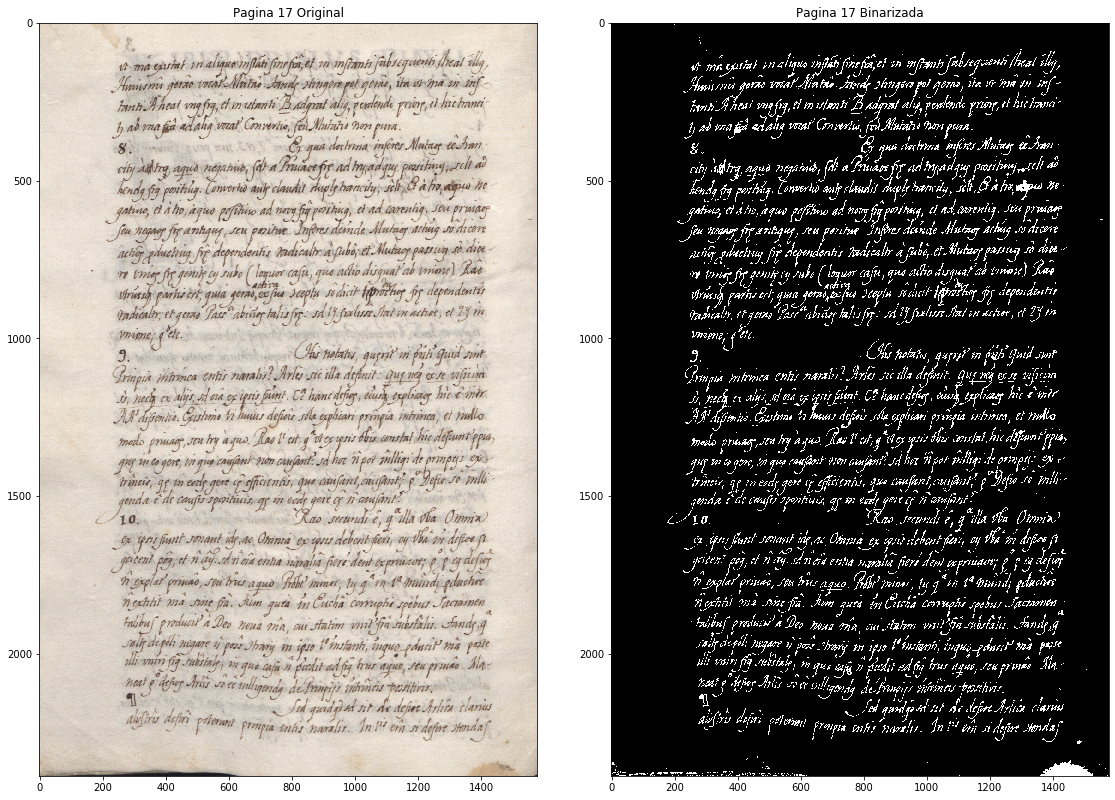

In [151]:
## (1) lectura de imagen
gray = cv2.imread("Hojas/rm_149_008.tif", 0)
img = cv2.imread("Hojas/rm_149_008.tif")
h_gray, w_gray = gray.shape[:2]
gray = gray[0 : h_gray - 50, 0:w_gray]
blur = cv2.GaussianBlur(gray, (5, 5), 0)

img = cv2.imread("Hojas/rm_149_008.tif")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

## (2) binarización
light_orange = (
    round(23 / 2),
    round(255 * 0.0984),
    round(255 * 0.7176),
)  # 23°, 9.84%, 71.76%
dark_orange = (
    round(14 / 2),
    round(255 * 0.3923),
    round(255 * 0.5098),
)  # 14°, 14.62%, 67.06%

mask = cv2.inRange(hsv, (0, 0, 0), dark_orange)
dst1 = cv2.bitwise_and(img, img, mask=mask)

th, threshed = cv2.threshold(v, 210, 255, cv2.THRESH_BINARY_INV)
dst2 = cv2.bitwise_and(img, img, mask=threshed)

th, threshed2 = cv2.threshold(s, 50, 255, cv2.THRESH_BINARY_INV)
dst3 = cv2.bitwise_and(img, img, mask=threshed2)

cv2.imwrite("dst1.png", dst1)
cv2.imwrite("dst2.png", dst2)
cv2.imwrite("dst3.png", dst3)


dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2GRAY)
dst3 = cv2.cvtColor(dst3, cv2.COLOR_BGR2GRAY)

th, threshed_dst2 = cv2.threshold(dst2, 0, 100, cv2.THRESH_BINARY)
th, threshed_dst3 = cv2.threshold(dst3, 20, 255, cv2.THRESH_BINARY_INV)
dst4 = cv2.bitwise_and(threshed_dst2, threshed_dst3)
th, threshed_dst4 = cv2.threshold(dst4, 0, 255, cv2.THRESH_BINARY)

cv2.imwrite("threshed_dst2.png", threshed_dst2)
cv2.imwrite("threshed_dst3.png", threshed_dst3)
cv2.imwrite("threshed_dst4.png", threshed_dst4)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(img)
plt.title("Pagina 17 Original")
plt.subplot(122), plt.imshow(threshed_dst4, cmap=plt.cm.gray)
plt.title("Pagina 17 Binarizada")
plt.subplots_adjust(top=1, bottom=0.01, left=0.01, right=1, hspace=0.1, wspace=0.15)
plt.show()

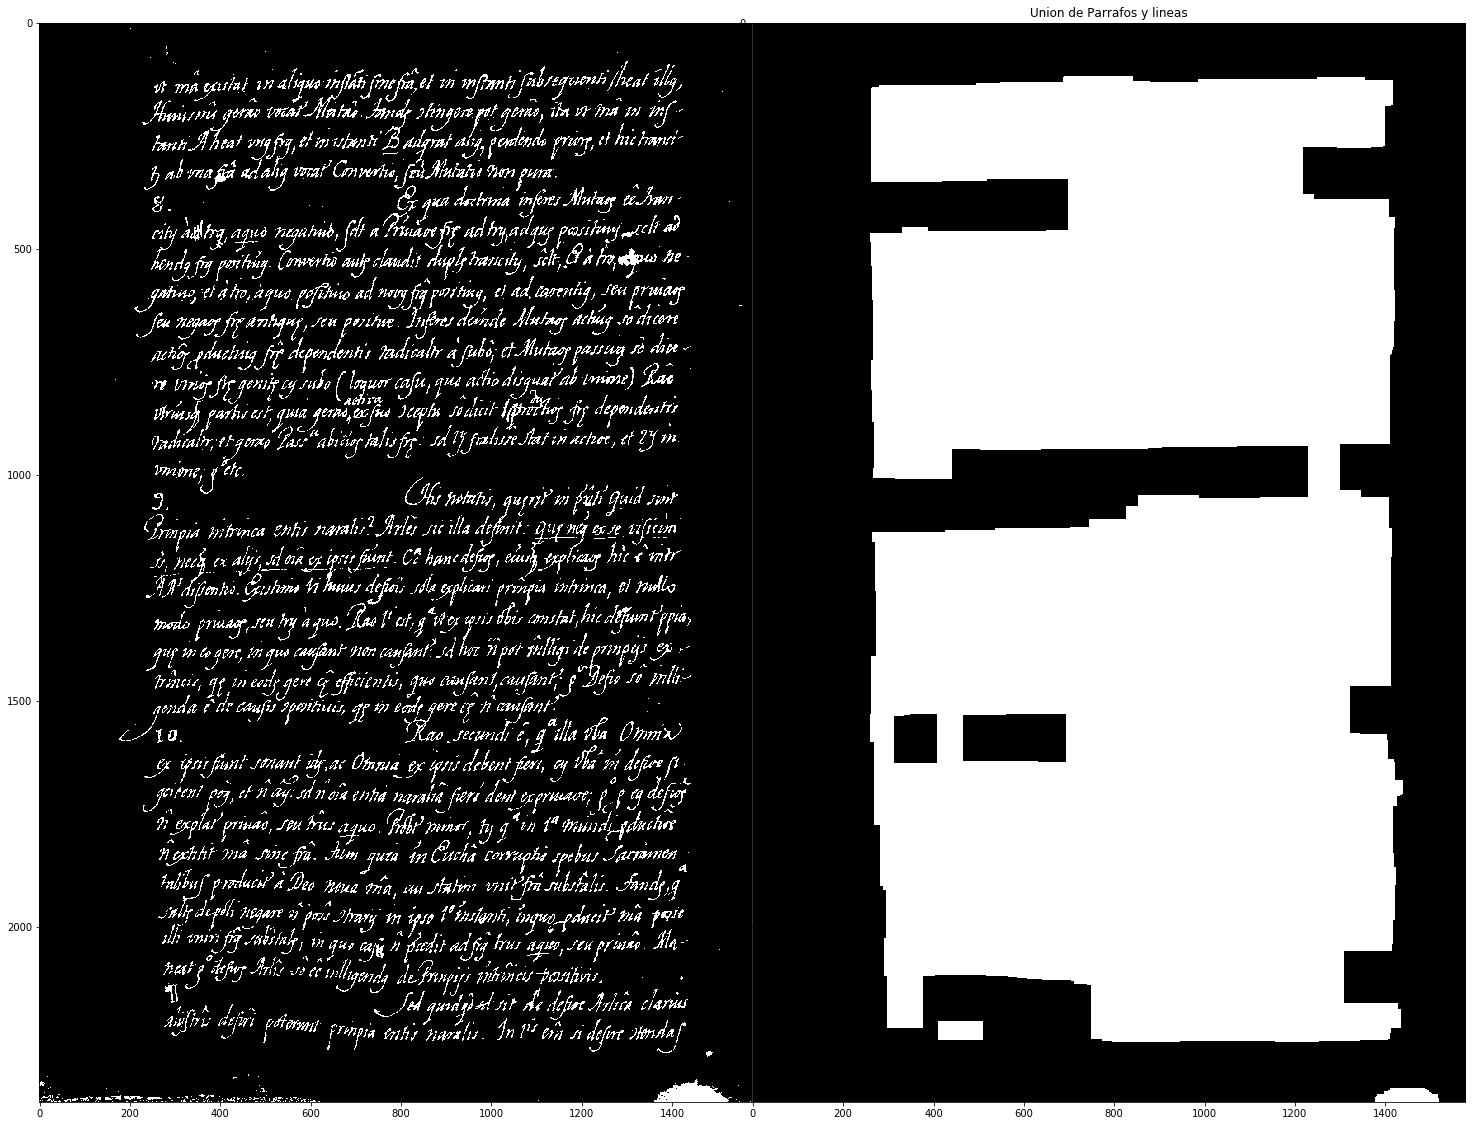

In [152]:
## (3) toma de esquinas correspondientes al area de todo el texto
kernelp11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
filtroAp = cv2.morphologyEx(threshed_dst4, cv2.MORPH_OPEN, kernelp11)
filtroCier = cv2.morphologyEx(filtroAp, cv2.MORPH_CLOSE, kernelp11)
kernelp11 = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 2))
cerradaP11_1 = cv2.morphologyEx(filtroCier, cv2.MORPH_CLOSE, kernelp11)
kernelp11 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 60))
cerradaP11_2 = cv2.morphologyEx(cerradaP11_1, cv2.MORPH_CLOSE, kernelp11)
kernelp11 = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 20))
abiertaP11_3 = cv2.morphologyEx(cerradaP11_2, cv2.MORPH_OPEN, kernelp11)
kernelp11 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 100))
abiertaP11_4 = cv2.morphologyEx(abiertaP11_3, cv2.MORPH_CLOSE, kernelp11)


## (6) Show everything
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(threshed_dst4, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(abiertaP11_4, cmap=plt.cm.gray)
plt.title("Union de Parrafos y lineas")
# plt.subplot(223), plt.imshow(cerradaP11_1, cmap=plt.cm.gray)
# plt.title( "cerradaP11_1")
plt.subplots_adjust(top=1, bottom=0.01, left=0.01, right=1, hspace=0.1, wspace=0.001)
plt.show()

1257
-0.05175768956542015
1257
-0.05175768956542015


<Figure size 864x864 with 0 Axes>

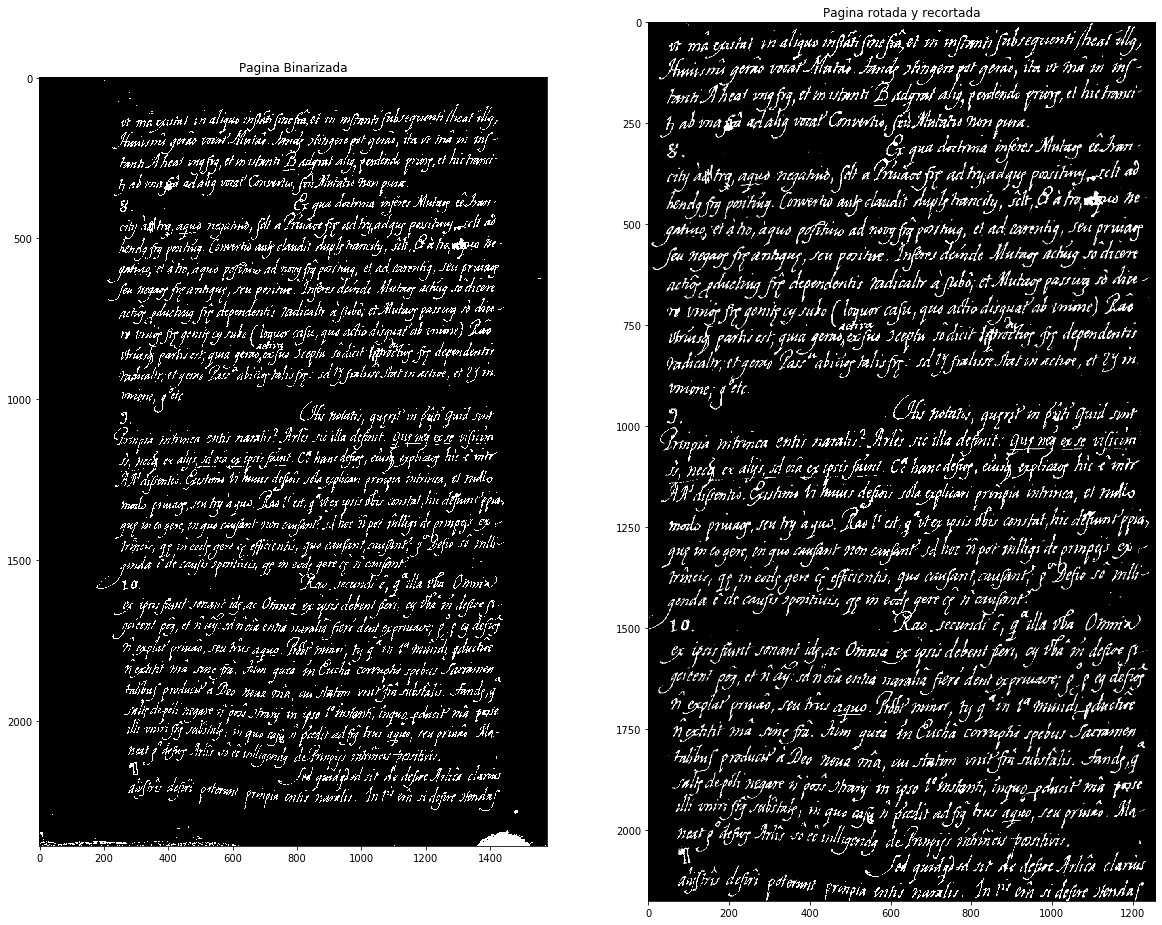

In [153]:
plt.figure(figsize=(12, 12))
centroide_x = []
centroide_y = []
Imagenes = []


def crop_rect(img, rect):
    # get the parameter of the small rectangle
    center, size, angle = rect[0], rect[1], rect[2]            
    center, size = tuple(map(int, center)), tuple(map(int, size))
    # get row and col num in img
    height, width = img.shape[0], img.shape[1]
    print ( size[0])
    print (angle)
    if angle < -45:
        angle =90+ angle
        x = size[1]
        y = size[0]
    else:
        angle = angle
        x = size[0]
        y = size[1]
    # calculate the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1)
    # rotate the original image
    img_rot = cv2.warpAffine(img, M, (width, height))

    # now rotated rectangle becomes vertical and we crop it
    img_crop = cv2.getRectSubPix(img_rot, (x,y), center)

    return img_crop


abierta = abiertaP11_4.copy()
# find contours / rectangle
(contornos, _) = cv2.findContours(abierta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

area = []
for j in range(0, len(contornos)):
    cnt = contornos[j]
    area.append(cv2.contourArea(cnt))
contorno_max = area.index(np.max(area))
rect = np.array(cv2.minAreaRect(contornos[contorno_max]))
offset = 20
rect[0] = tuple(map(sum, zip(rect[0], (-0.8 * offset, -0.8 * offset))))
rect[1] = tuple(map(sum, zip(rect[1], (offset * 4, offset * 2))))

# crop
img_croped = crop_rect(threshed_dst4, rect)
img0_croped = crop_rect(img, rect)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(threshed_dst4, cmap=plt.cm.gray)
plt.title("Pagina Binarizada")
plt.subplot(1, 2, 2)
plt.imshow(img_croped, cmap=plt.cm.gray)
plt.title("Pagina rotada y recortada")
plt.show()

Hay 31 Renglones


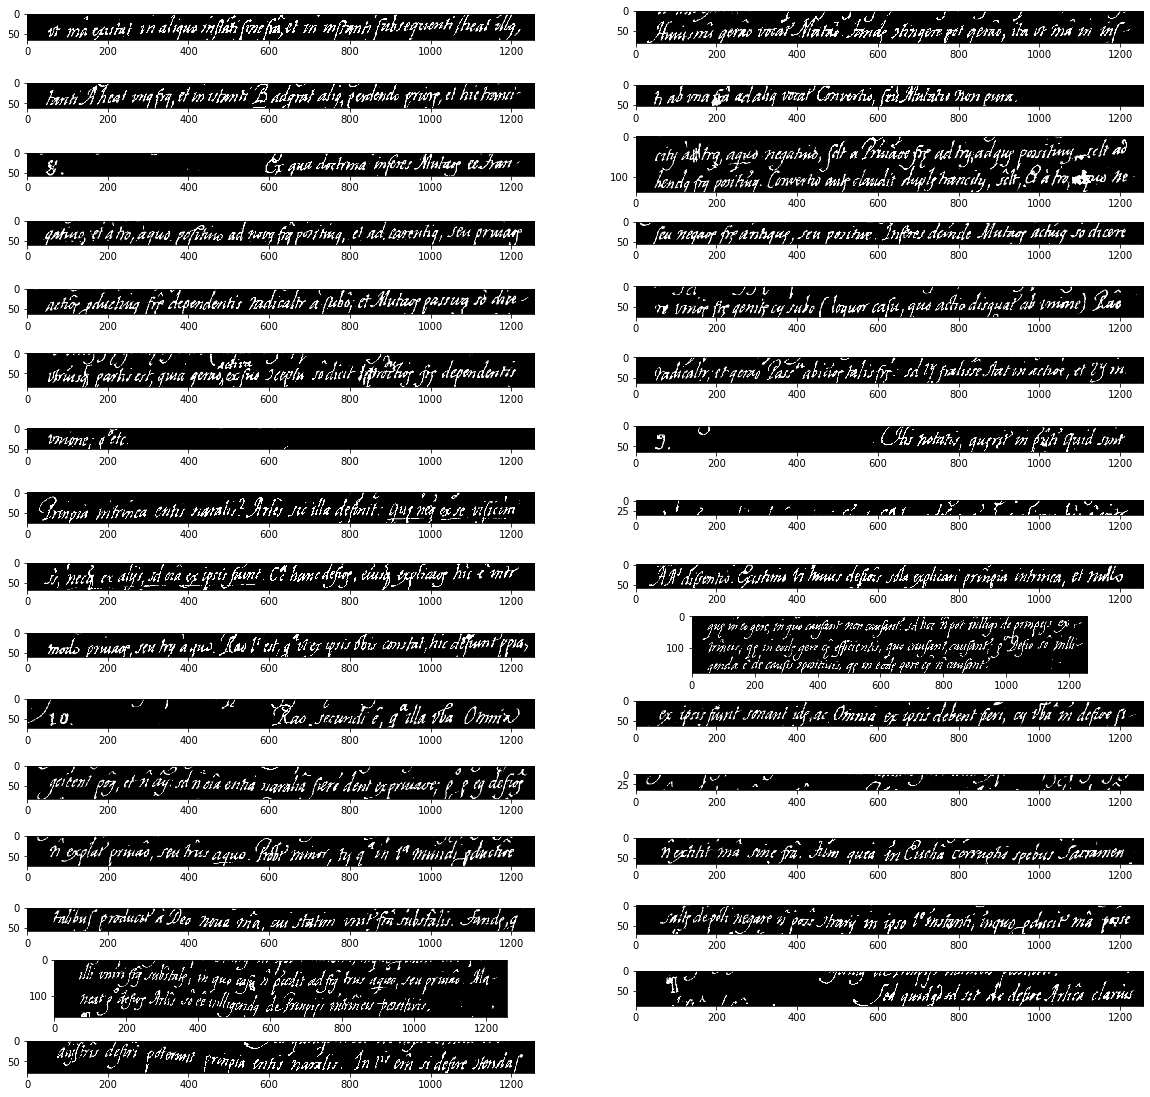

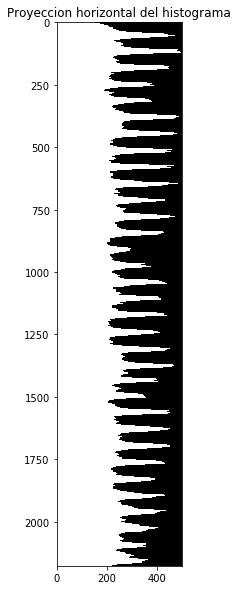

In [154]:
import numpy as np

# img = cv2.imread("Hojas/rm_149_024.tif")
gris = cv2.cvtColor(img0_croped, cv2.COLOR_BGR2GRAY)
img_c = img0_croped.copy()
gris_c = gris.copy()
gris_c = 255 - gris_c
histograma = cv2.calcHist([gris_c], [0], None, [256], [0, 256])
filas, columnas = img.shape[:2]
# print (filas)
# print(columnas)
proj = np.sum(gris_c, 1)
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0], 500))

for row in range(gris_c.shape[0]):
    cv2.line(result, (0, row), (int(proj[row] * w / m), row), (255, 255, 255), 1)

mayor = np.max(proj)
menor = np.min(proj)
# print(mayor)

contador = []
a = 0
coords = []
renglon = []
minimo = 0
x = 0
y = 0
for i in range(len(proj)):
    if proj[i] > mayor*0.5:
        a = a + 1
        if x == 0:
            x = i
        y = i
        # print(coords)
    else:
        if a > 5:
            minimo = x
            maximo = y
            cropped = img_croped[minimo - 20 : maximo + 10, 0:columnas]
            renglon.append(cropped)
            x = 0
            contador.append(a)
            # print(maximo)
        a = 0
x = len(contador)
print("Hay " + str(x) + " Renglones")
# print(contador)

plt.figure(figsize=(20, 20))
for j in range(len(renglon)):
    plt.subplot(int(len(renglon) / 2) + 1, 2, j + 1), plt.imshow(
        renglon[j], cmap=plt.cm.gray
    )

plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1), plt.imshow(result, cmap=plt.cm.gray)
plt.title("Proyeccion horizontal del histograma")
#plt.savefig("histlineas.png")
plt.show()

In [8]:
def get_road_block_regions(nmap):
    road_blocks = []
    needtobreak = False
    
    for col in range(nmap.shape[1]):
        start = col
        end = col+20
        if end > nmap.shape[1]-1:
            end = nmap.shape[1]-1
            needtobreak = True
        if path_exists(nmap[:, start:end]) == False:
            road_blocks.append(col)
        if needtobreak == True:
            break
            
    return road_blocks

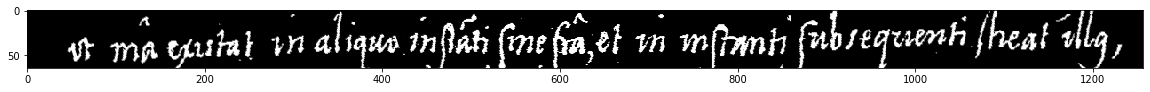

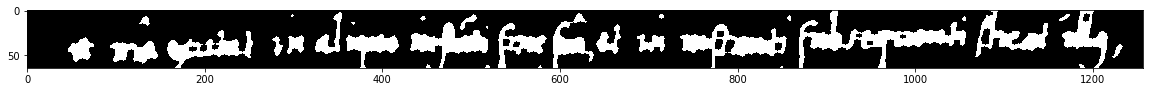

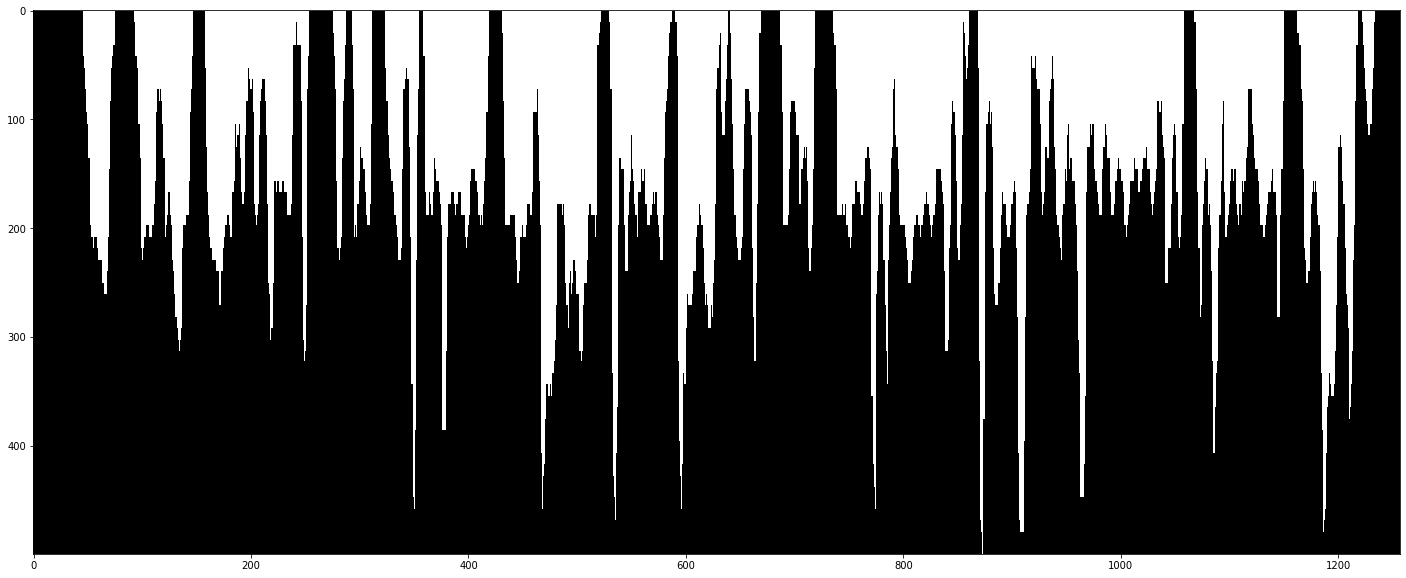

In [155]:
linea_c = renglon[0].copy()


filas, columnas = linea_c.shape[:2]


phas = 20
pts1 = np.float32([[phas, 0], [columnas, 0], [0, filas], [columnas - phas, filas]])
pts2 = np.float32([[0, 0], [columnas, 0], [0, filas], [columnas, filas]])

M = cv2.getPerspectiveTransform(pts1, pts2)

linea_c_deslant = cv2.warpPerspective(linea_c, M, (columnas, filas))

linea_c_deslant_mb = cv2.threshold(
    cv2.medianBlur(linea_c_deslant, 5), 20, 255, cv2.THRESH_BINARY
)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 5))
cerrada = cv2.morphologyEx(linea_c_deslant_mb, cv2.MORPH_CLOSE, kernel)

proj = np.sum(cerrada, 0)
m = 500
w = np.max(proj)
result = np.zeros((500, cerrada.shape[1]))


for col in range(cerrada.shape[1]):
    cv2.line(result, (col, 0), (col, int(proj[col] * m / w)), (255, 255, 255), 1)

plt.figure(figsize=(20, 20))
plt.imshow(linea_c_deslant, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(cerrada, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(160, 10))
plt.imshow(result, cmap=plt.cm.gray)
plt.show()

12240
17
[29, 54, 96, 12, 19, 31, 60, 91, 58, 49, 28, 32, 125, 189, 82, 56, 12]


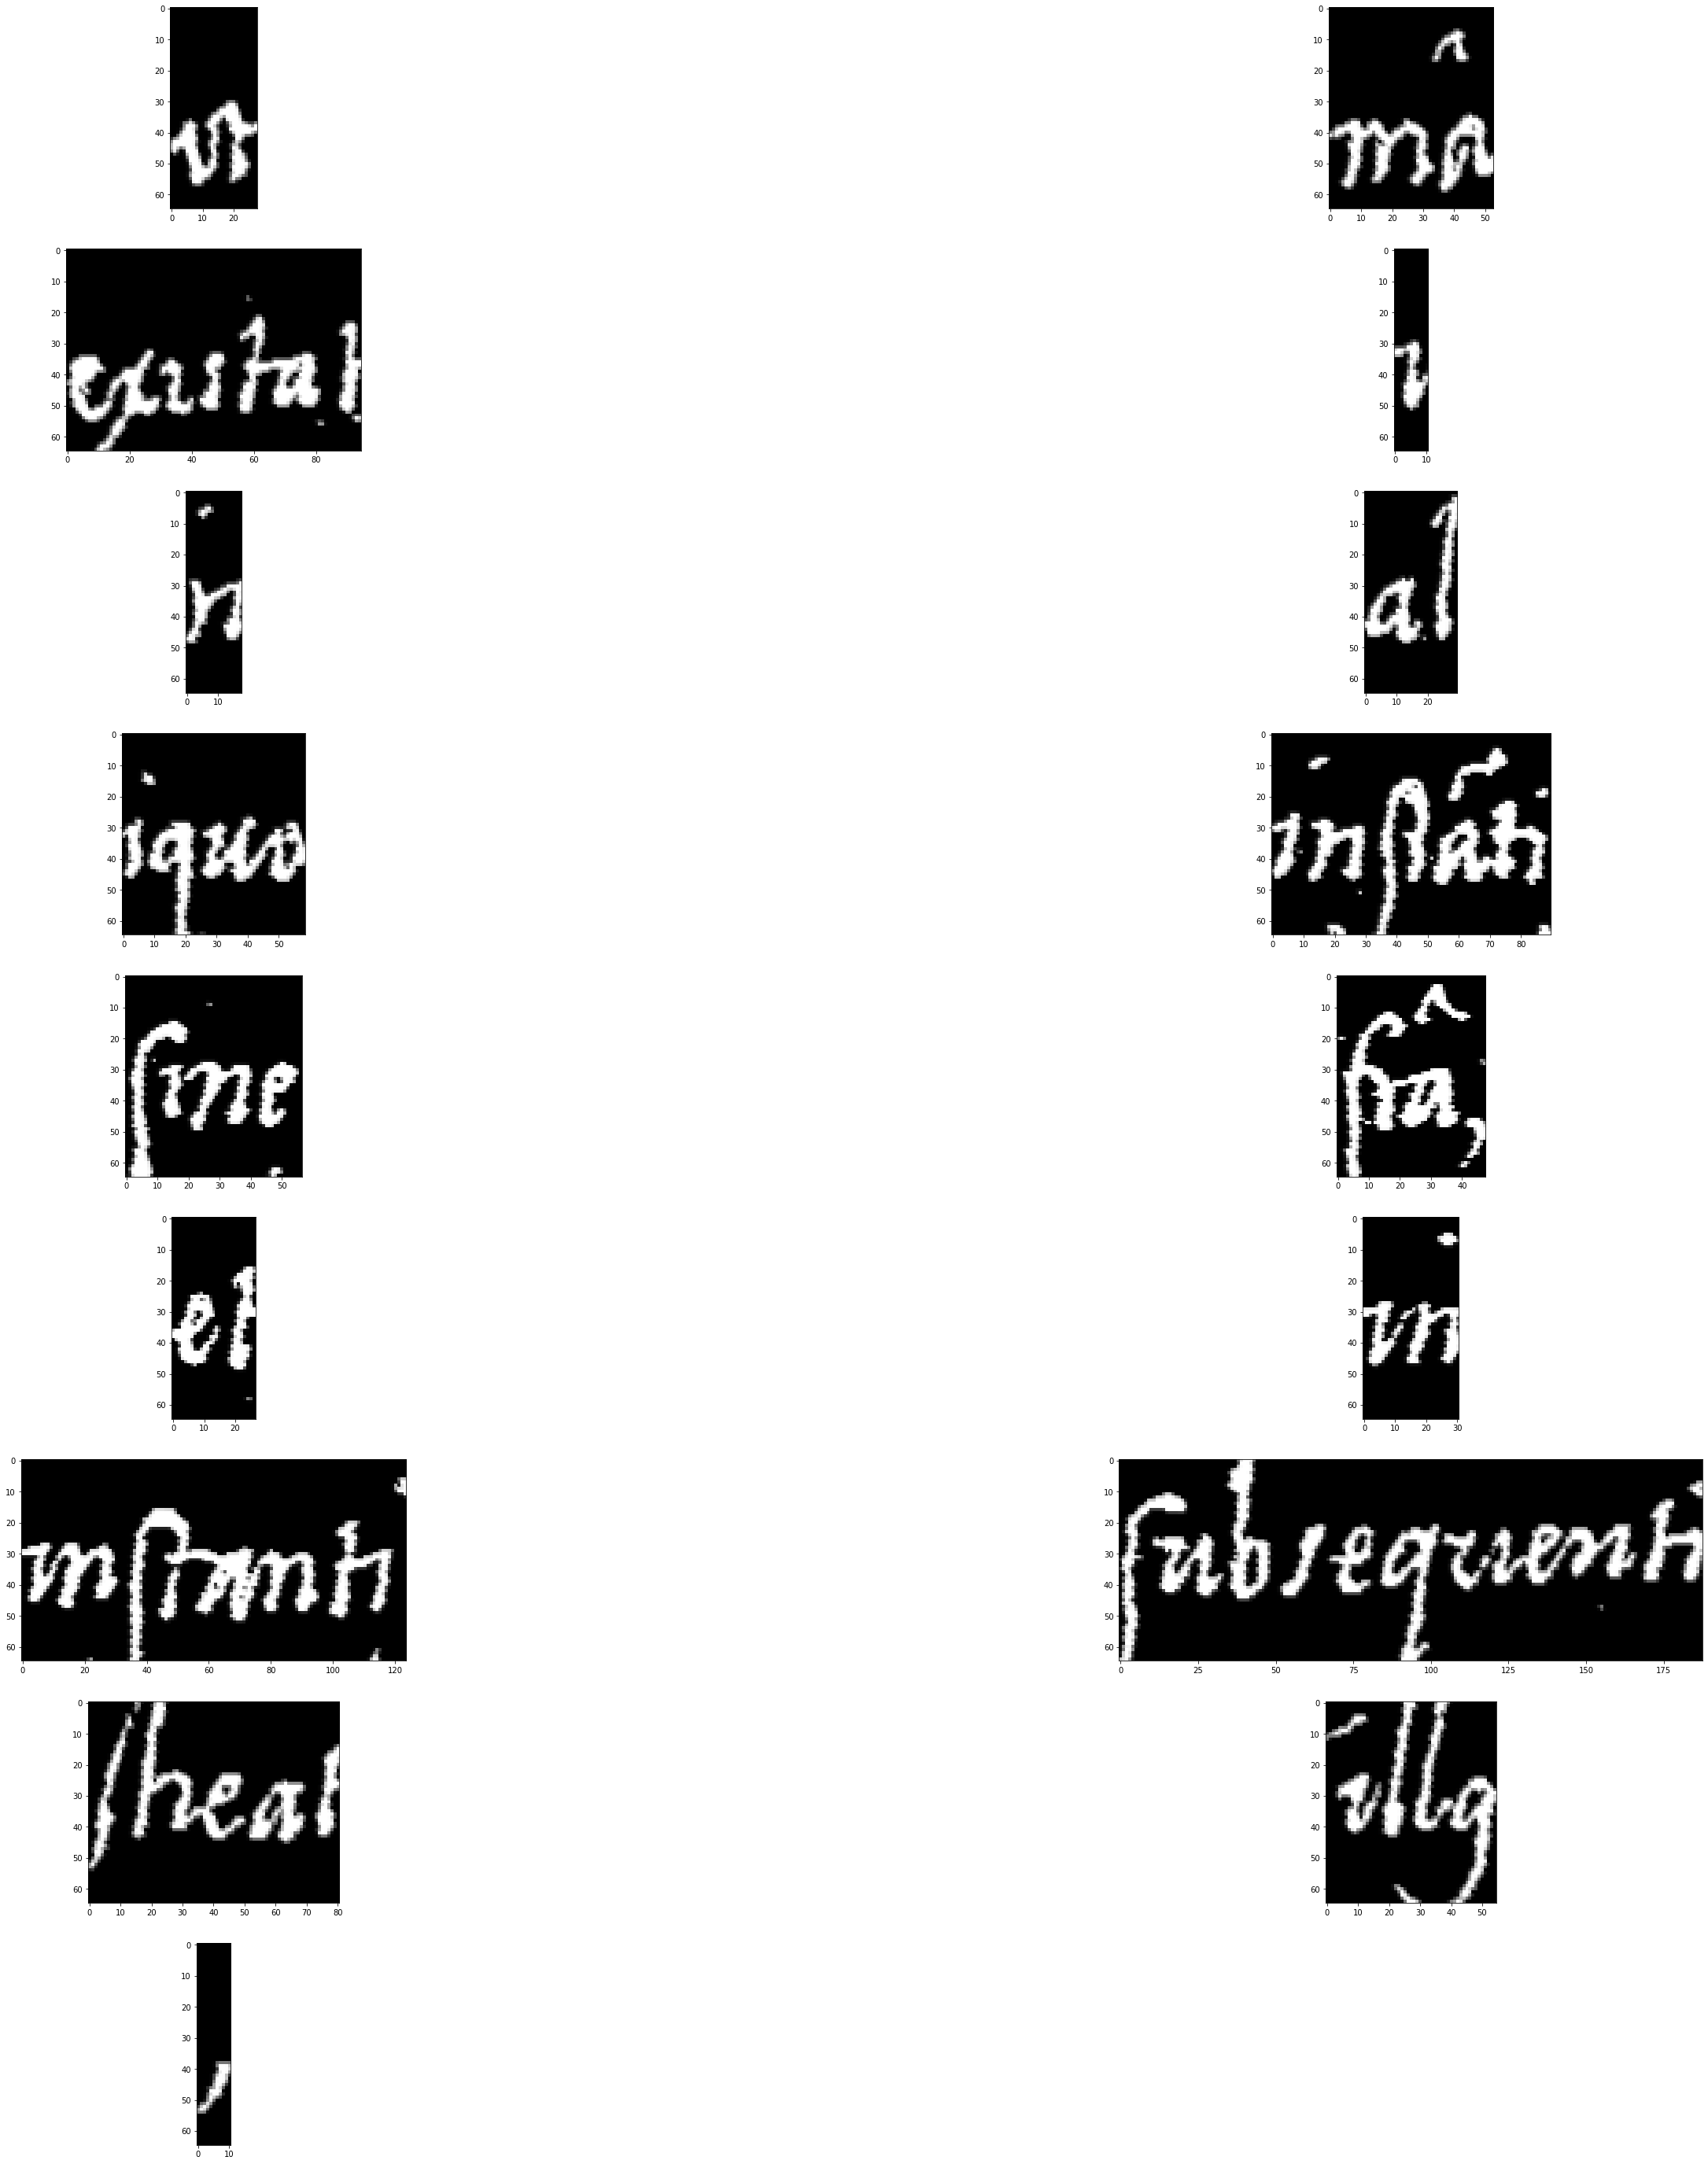

In [156]:
mayor = np.max(proj)
menor = np.min(proj)
print(mayor)

contador=[]
a = 0
coords = []
palabra = []
minimo = 0
x = 0
y = 0
for i in range(len(proj)):
    if proj[i] > 1:
        a = a + 1
        if x == 0:
            x = i
        y = i
        coords.append(i)
        # print(coords)
    else:
        if a > 1:
            minimo = x
            maximo = y
            cropped = linea_c_deslant[0:filas, minimo:maximo]
            palabra.append(cropped)
            x =0
            contador.append(a)
            # print(maximo)
        a = 0
print(len(contador))
print(contador)
# print(proj[col])

plt.figure(figsize=(50, 50))
for j in range(len(palabra)):
    plt.subplot(int(len(palabra) / 2) + 1, 2, j + 1), plt.imshow(
        palabra[j], cmap=plt.cm.gray
    )

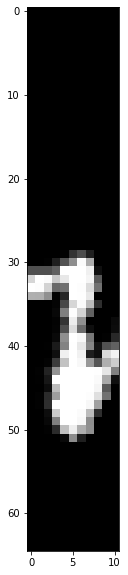

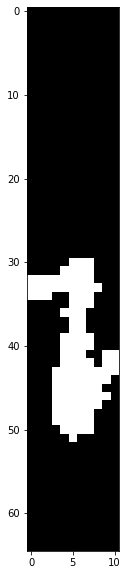

In [157]:
palabra_c = palabra[3].copy()


filas, columnas = palabra_c.shape[:2]

palabra_c_mb = cv2.threshold(palabra_c, 100, 255, cv2.THRESH_BINARY)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
cerrada = cv2.morphologyEx(palabra_c_mb, cv2.MORPH_OPEN, kernel)

proj = np.sum(cerrada, 0)
m = 500
w = np.max(proj)
result = np.zeros((500, cerrada.shape[1]))


for col in range(cerrada.shape[1]):
    cv2.line(result, (col, 0), (col, int(proj[col] * m / w)), (255, 255, 255), 1)

    

    
plt.figure(figsize=(10, 10))
plt.imshow(palabra_c, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(cerrada, cmap=plt.cm.gray)
plt.show()


11


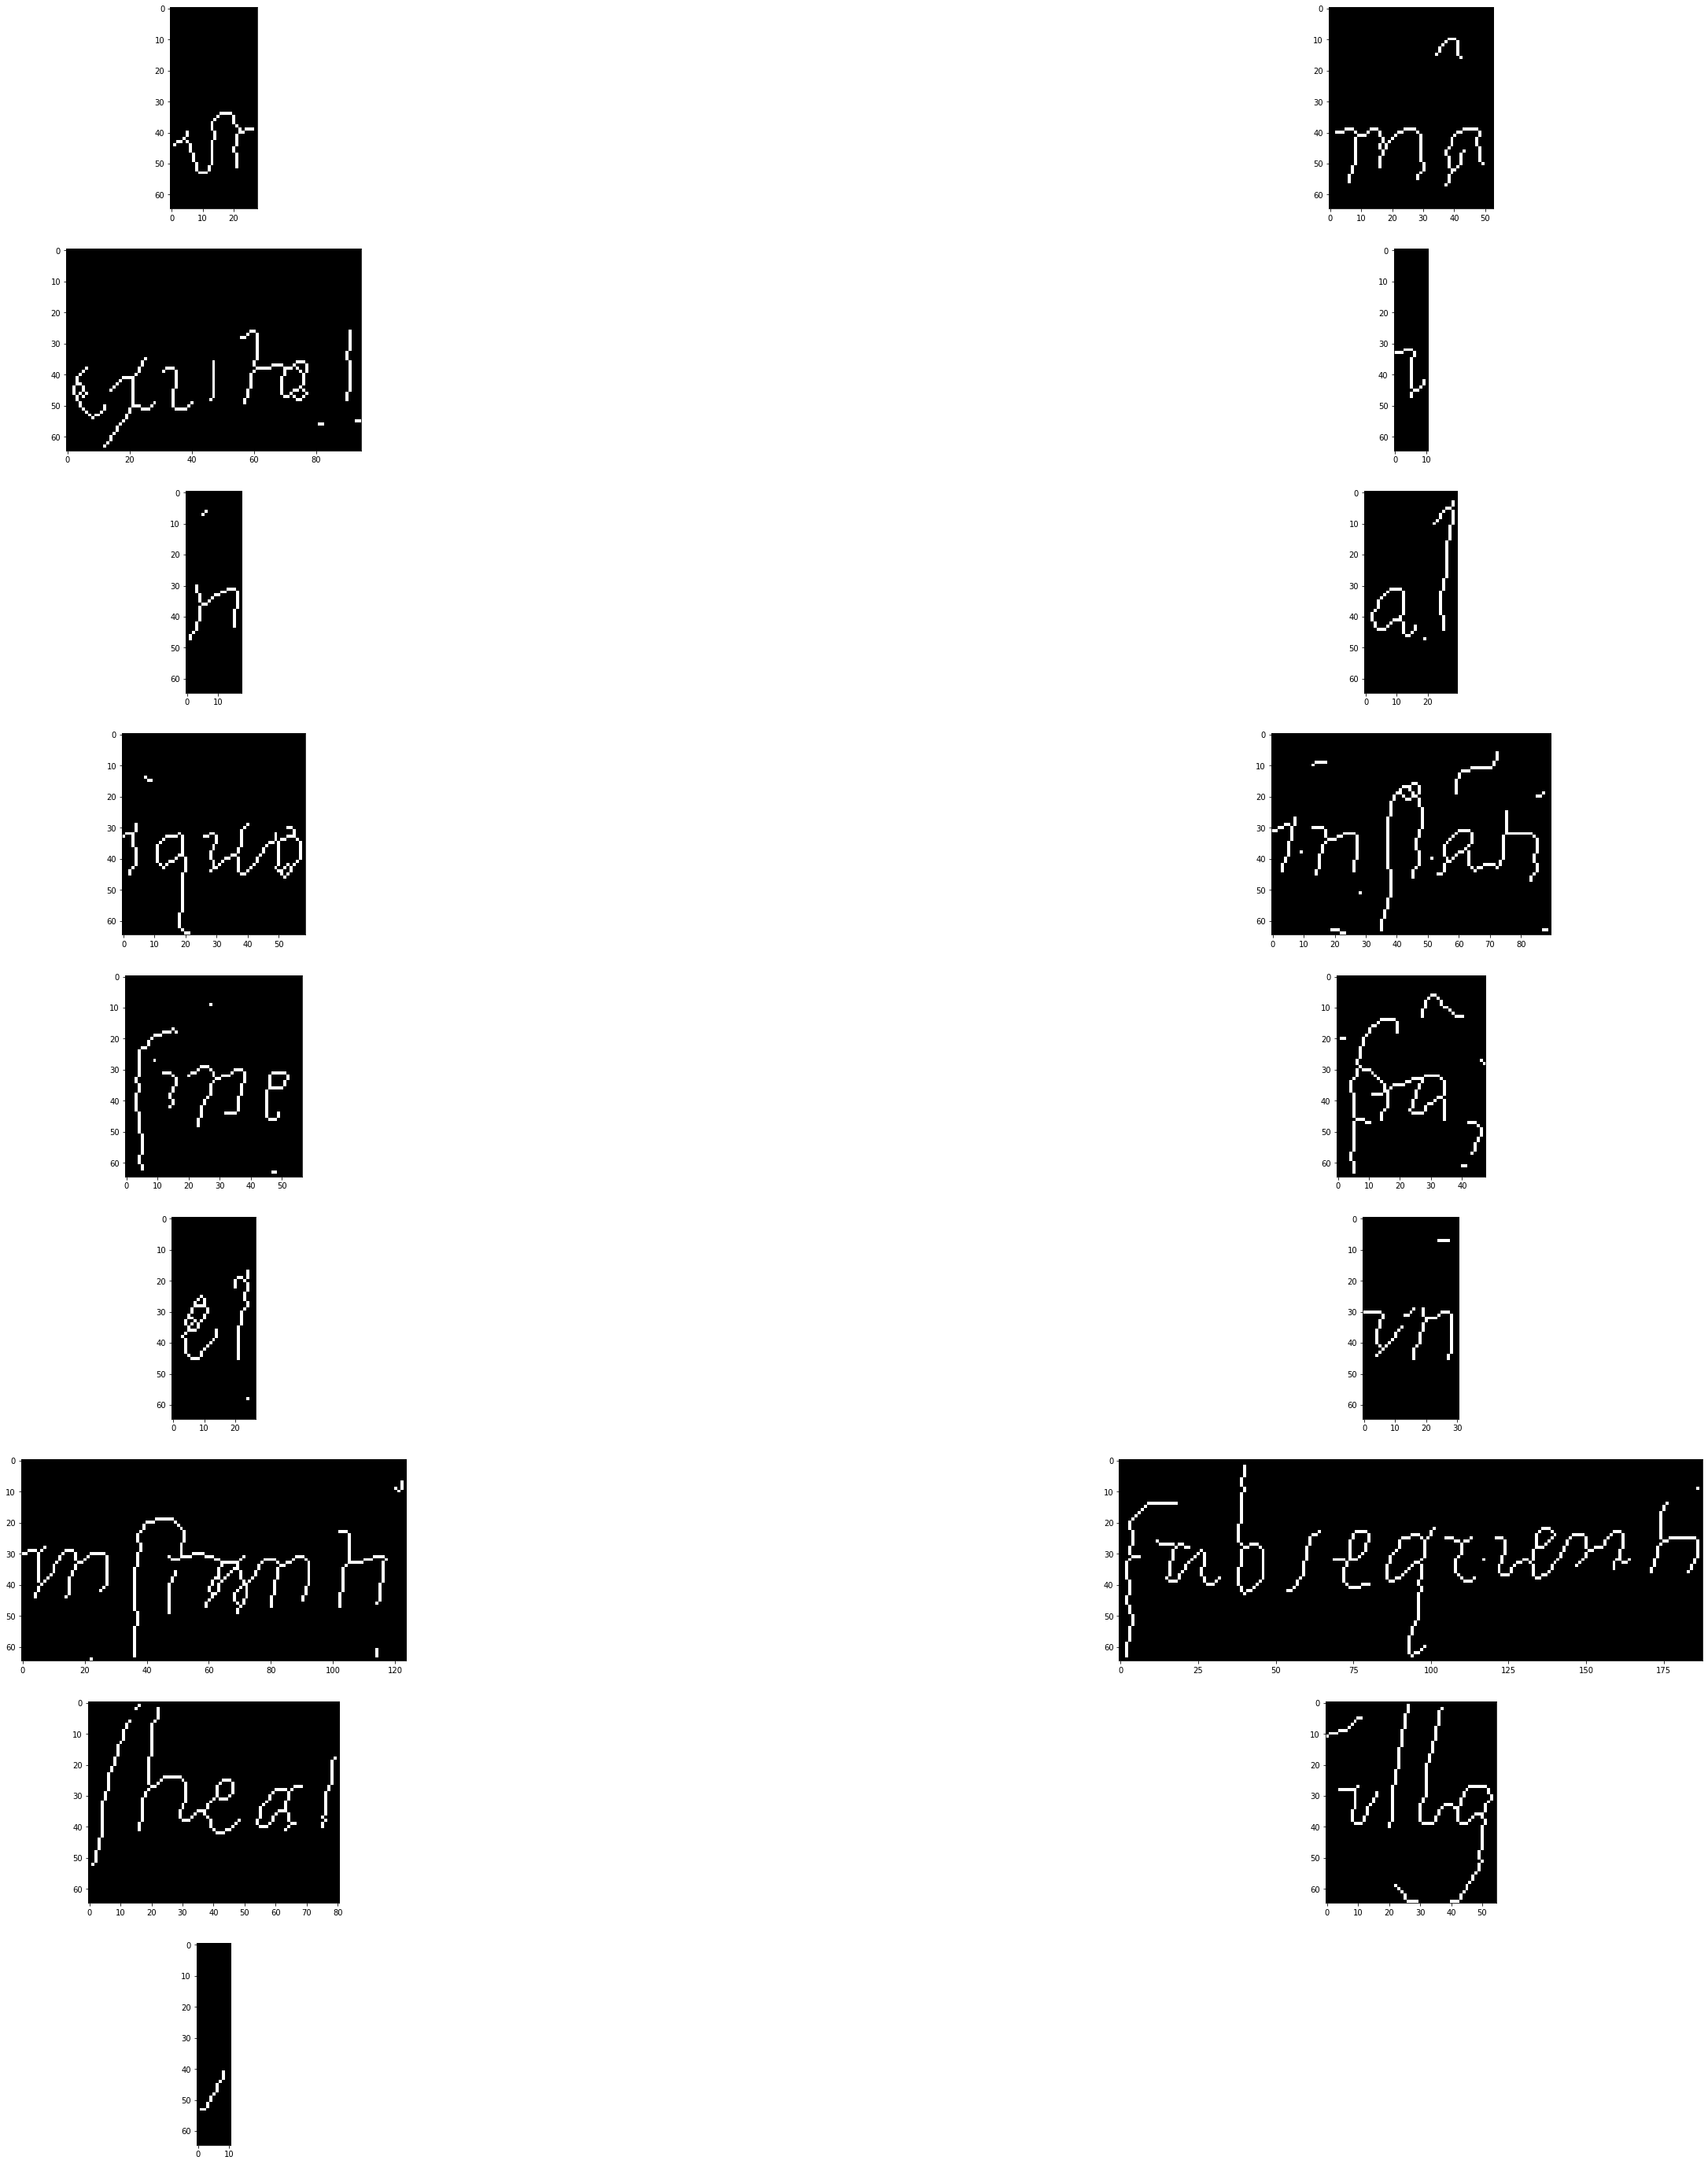

In [158]:
from skimage.morphology import skeletonize

skeletonization = []
i = 0
j = 0
for i in range (len(palabra)):
    ret,palabra_c_mb = cv2.threshold(palabra[i], 127, 255, cv2.THRESH_BINARY)
    skeletonization.append(skeletonize(palabra_c_mb,method = 'lee'))

print(columnas)
plt.figure(figsize=(50, 50))
for j in range(len(skeletonization)):
    plt.subplot(int(len(skeletonization) / 2) + 1, 2, j + 1), plt.imshow(
        skeletonization[j], cmap=plt.cm.gray
    )

0 0 0 0
0 1 0 0
29 29 29 0
29 30 29 0
41 41 41 0
41 42 41 0
41 43 42 0
41 44 42 0
41 45 43 0
48 48 48 0
48 49 48 0
48 50 49 0
48 51 49 0
48 52 50 0
48 53 50 0
48 54 51 0
48 55 51 0
78 78 78 0
78 79 78 0
78 80 79 0
80 83 81 0
80 84 82 0
80 85 82 0
80 86 83 0
80 87 83 0
80 88 84 0
80 89 84 0
92 92 92 0
95


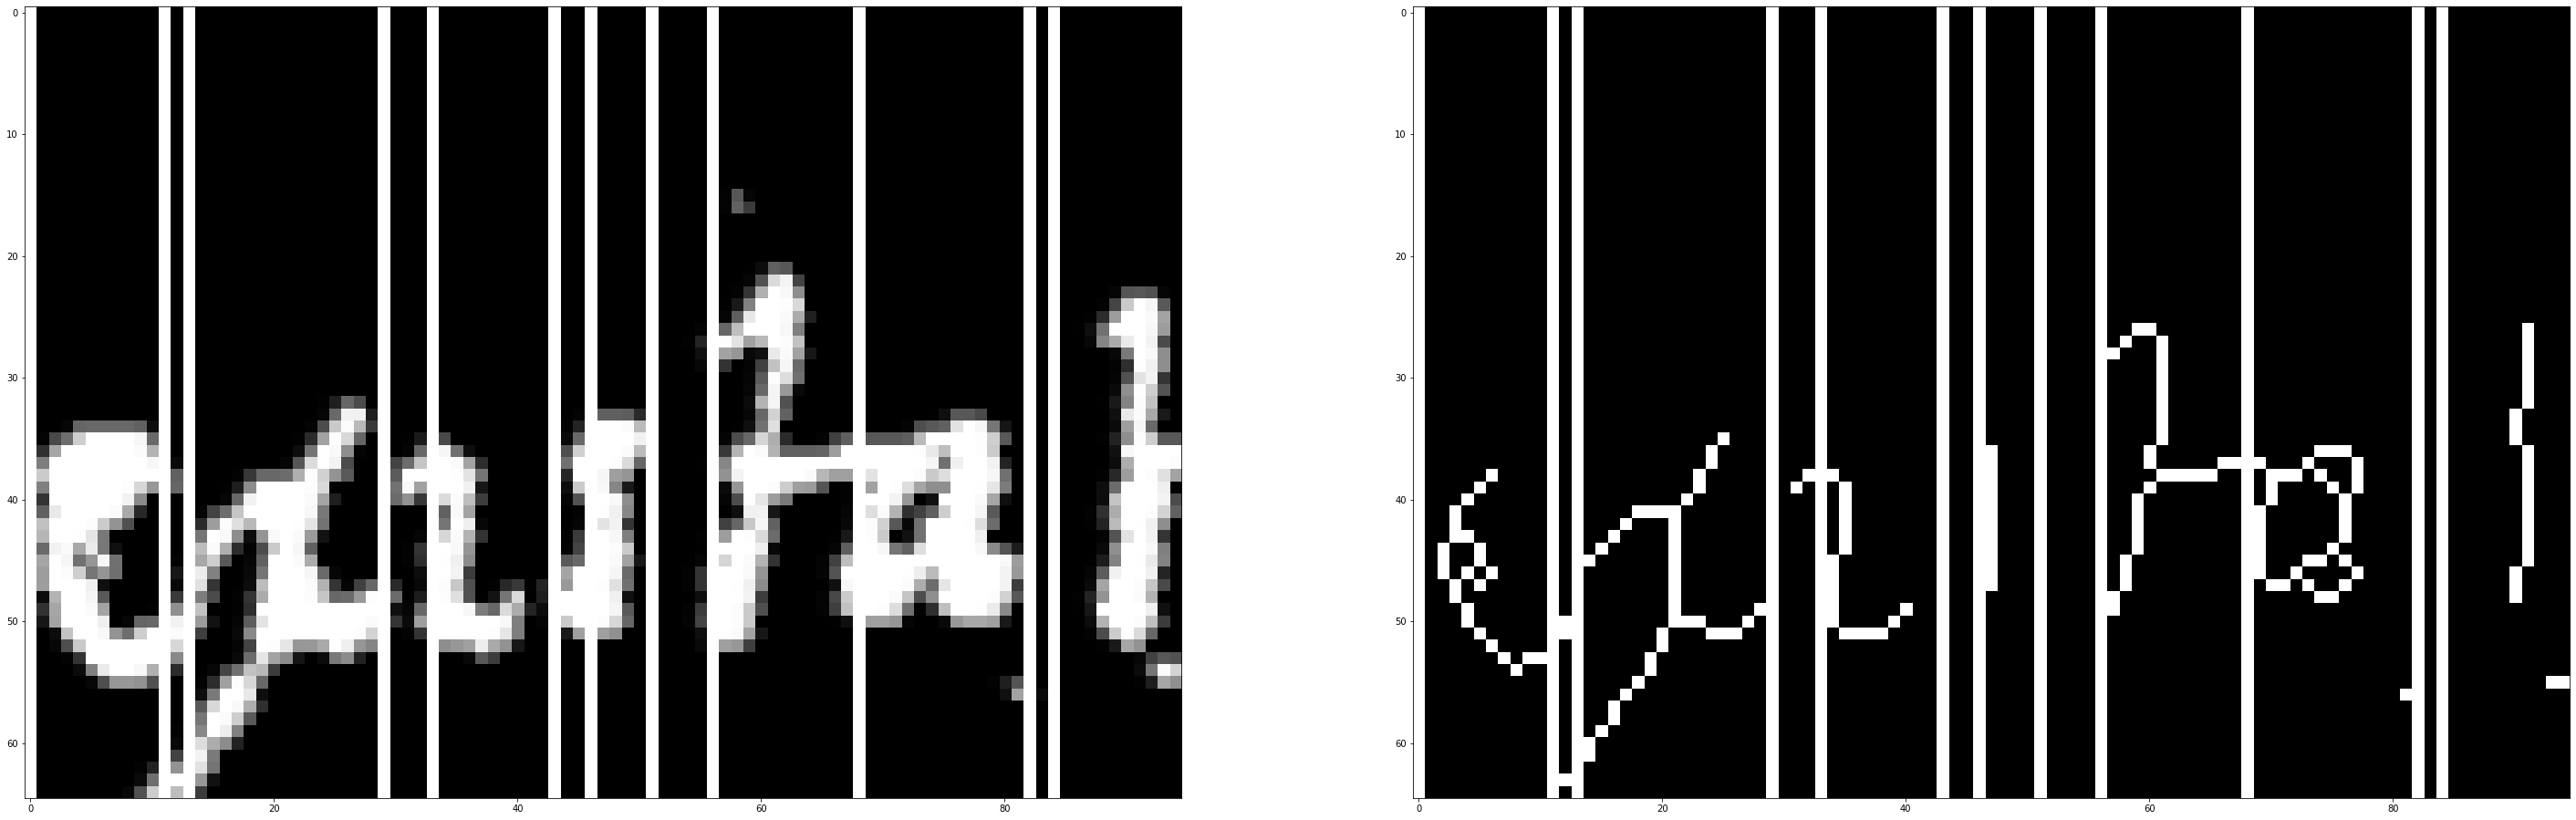

In [180]:
i=0
crop = []
init1 = 0
a = 0
b = 0
c = 0
i = 0
x = 0
y = 0
j = 0
separacion = skeletonization[2].copy() # Se escoge una palabra del renglon
palabra_c = palabra[2].copy()
fil,col = separacion.shape 
 
for i in range(col):                             # Se suman todas las columnas que componen la palabra
    #print(np.sum(separacion[0:fil,i:i+1]))
    if np.sum(separacion[0:fil,i:i+1])==0:
        x = i-a
        y = i
        coord1 = int((x+y)/2)
        a = a + 1
        print(x,y,coord1,np.sum(separacion[0:fil,i:i+1]))
    elif np.sum(separacion[0:fil,i:i+1])==255:
        x = i-c
        y = i
        coord2 = int((x+y)/2)
        b = b+1
    else:
        if a > 0:
            x = 0
            image = cv2.line(palabra_c, (coord1,0),(coord1,fil), (255, 255, 255), 1)
            image1 = cv2.line(separacion, (coord1,0),(coord1,fil), (255, 255, 255), 1)
            #print(a)
            a = 0
        
        if b > 0:
            x = 0
            image = cv2.line(palabra_c,(coord2,0),(coord2,fil), (255, 255, 255), 1)
            image1 = cv2.line(separacion,(coord2,0),(coord2,fil), (255, 255, 255), 1)
            #print(b)
            b = 0
            
print(col)
plt.figure(figsize=(50, 50))
#for j in range(len(crop)):
#    plt.subplot(int(len(crop) / 2) + 1, 2, j + 1), plt.imshow(
#        crop[j], cmap=plt.cm.gray)
plt.subplot(1,2,1),plt.imshow(image,cmap=plt.cm.gray)
plt.subplot(1,2,2),plt.imshow(image1,cmap=plt.cm.gray)
plt.show()

In [181]:
import cv2
import numpy as np

SZ=20
bin_n = 16 # Number of bins

svm_params = dict( kernel_type = cv2.SVM_LINEAR,
                    svm_type = cv2.SVM_C_SVC,
                    C=2.67, gamma=5.383 )

affine_flags = cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR

def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img

def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

img = cv2.imread('Letras_Finales/c1.png',0)

AttributeError: module 'cv2.cv2' has no attribute 'SVM_LINEAR'